<a href="https://colab.research.google.com/github/RolandoOrtizB/Bootcamp/blob/main/Proyecto20042024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de Ventas de una Tienda Online**
**Objetivos:**

**Limpieza de datos:** Limpiar y preparar los datos de ventas para el análisis.

**Análisis exploratorio:**Realizar un análisis exploratorio de los datos utilizando gráficos.

**Clústeres:** Agrupar clientes o productos en clústeres basados en sus comportamientos de compra.

**Visualización:**Crear visualizaciones para representar los hallazgos.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [35]:
ruta ='/ventas-por-factura.csv'
df = pd.read_csv(ruta)


url del data set

In [64]:
print(df.shape)

(22221, 7)


# **Análisis exploratorio de datos**

In [63]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,mes
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,22933.0,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,20973.0,2021-11
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-145.0,2021-10
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,3995.0,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,34483.0,2021-10


In [38]:
#validar si los espacios son categorica y numerica, se realiza validacion para tipo de la infomacion con data.info()  int64 numerica, object categorica, float64 flotante
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


validar:
1. datos faltantes celdas en blanco
2. columnas irrelevantes.
3. registros repetidos, eliminar filas repetidas
4. valores extremos. (outliers) ejemplo edad 200 años
5. errores tipograficos unificar tipogramia todos M o m




In [39]:
# Eliminar duplicados
df = df.drop_duplicates()

# Tratar valores nulos (dependiendo de las columnas, esto puede variar)
df = df.dropna()

# Convertir fechas si hay una columna de fecha
if 'fecha_venta' in df.columns:
    df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

df.info()  # Para verificar los tipos de datos

<class 'pandas.core.frame.DataFrame'>
Index: 22221 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     22221 non-null  object 
 1   Fecha de factura  22221 non-null  object 
 2   ID Cliente        22221 non-null  float64
 3   País              22221 non-null  object 
 4   Cantidad          22221 non-null  int64  
 5   Monto             22221 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


lo anterior, se extrae informacion de los niveles de cada columna categorica, para mirar si son informaciones unicas

In [40]:
df.describe() #nos deja ver todas las columnas nomericas


,ID Cliente,Cantidad
count,22221.000000,22221.000000
mean,15238.398317,220.822105
std,1732.987098,1169.306198
min,12346.000000,-80995.000000
25%,13755.000000,30.000000
50%,15136.000000,120.000000
75%,16746.000000,254.000000
max,18287.000000,80995.000000


In [41]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)  # elimina las filas duplicadas función de pandas
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (22221, 6)
Tamaño del set después de eliminar las filas repetidas: (22221, 6)


In [42]:
df.info()  # Para verificar los tipos de datos

<class 'pandas.core.frame.DataFrame'>
Index: 22221 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     22221 non-null  object 
 1   Fecha de factura  22221 non-null  object 
 2   ID Cliente        22221 non-null  float64
 3   País              22221 non-null  object 
 4   Cantidad          22221 non-null  int64  
 5   Monto             22221 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Si hay una columna de fecha, crear una columna de mes para análisis temporal
if 'fecha_venta' in df.columns:
    df['mes'] = df['fecha_venta'].dt.to_period('M')

# Ventas mensuales
if 'mes' in df.columns and 'cantidad' in df.columns:
    ventas_mensuales = df.groupby('mes')['cantidad'].sum()
    ventas_mensuales.plot(kind='bar')
    plt.title('Ventas Mensuales')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad Vendida')
    plt.show()

# Productos más vendidos
if 'producto_id' in df.columns and 'cantidad' in df.columns:
    productos_mas_vendidos = df.groupby('producto_id')['cantidad'].sum().sort_values(ascending=False).head(10)
    productos_mas_vendidos.plot(kind='bar')
    plt.title('Productos Más Vendidos')
    plt.xlabel('ID del Producto')
    plt.ylabel('Cantidad Vendida')
    plt.show()

Clustering validamos con clustering a los datos para identificar patrones entre los clientes o productos

In [44]:
from sklearn.cluster import KMeans

# Clustering de clientes
if 'cliente_id' in df.columns and 'cantidad' in df.columns and 'precio' in df.columns:
    clientes = df.groupby('cliente_id').agg({
        'cantidad': 'sum',
        'precio': 'sum'
    }).rename(columns={'cantidad': 'frecuencia_compra', 'precio': 'monto_total'})

    # Aplicar K-Means
    kmeans = KMeans(n_clusters=3)
    clientes['cluster'] = kmeans.fit_predict(clientes[['frecuencia_compra', 'monto_total']])

    # Visualizar clústeres
    sns.scatterplot(x='frecuencia_compra', y='monto_total', hue='cluster', data=clientes)
    plt.title('Clustering de Clientes')
    plt.xlabel('Frecuencia de Compra')
    plt.ylabel('Monto Total')
    plt.show()

In [45]:
# Eliminar duplicados
df = df.drop_duplicates()

# Tratar valores nulos
df = df.dropna()

# Convertir fechas
df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'], format='%m/%d/%Y %H:%M:%S')

# Convertir 'Monto' a numérico (eliminando las comas)
df['Monto'] = df['Monto'].str.replace(',', '').astype(float)

# Verificar los tipos de datos después de la limpieza
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22221 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   N° de factura     22221 non-null  object        
 1   Fecha de factura  22221 non-null  datetime64[ns]
 2   ID Cliente        22221 non-null  float64       
 3   País              22221 non-null  object        
 4   Cantidad          22221 non-null  int64         
 5   Monto             22221 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ MB


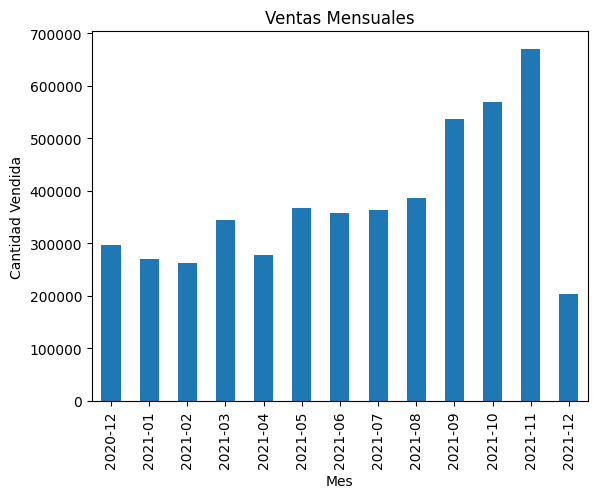

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna de mes para análisis temporal
df['mes'] = df['Fecha de factura'].dt.to_period('M')

# Ventas mensuales
ventas_mensuales = df.groupby('mes')['Cantidad'].sum()
ventas_mensuales.plot(kind='bar')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.show()

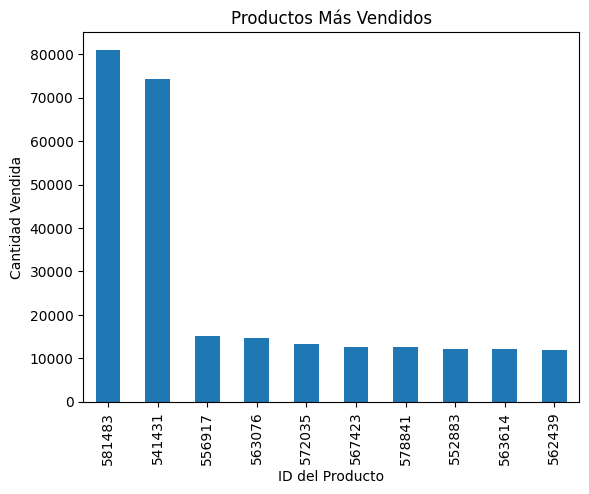

In [47]:
# Productos más vendidos
productos_mas_vendidos = df.groupby('N° de factura')['Cantidad'].sum().sort_values(ascending=False).head(10)
productos_mas_vendidos.plot(kind='bar')
plt.title('Productos Más Vendidos')
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad Vendida')
plt.show()

Basado en las visualizaciones, podemos inferir algunas tendencias de los datos de ventas. A continuación, describo las posibles tendencias que se pueden observar en los gráficos de ventas mensuales y de productos más vendidos.

**Picos de ventas:** Podremos identificar 3 meses específicos con ventas significativamente más altas, lo cual podría estar relacionado con eventos estacionales, promociones o lanzamientos de nuevos productos. en septiembre, octubre y noviembre

**Análisis de Productos Más Vendidos**
En el gráfico de productos más vendidos, observamos los productos que se venden en mayores cantidades. Las tendencias que podemos inferir incluyen:

**Productos populares: ** los productos 581483 y 541431 corresponden a las dos referencias con las ventas más altas y nos permite saber que son los más populares entre los clientes. Esto nos puede ayudar a la gestión de inventarios y a la planificación de futuras adquisiciones.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

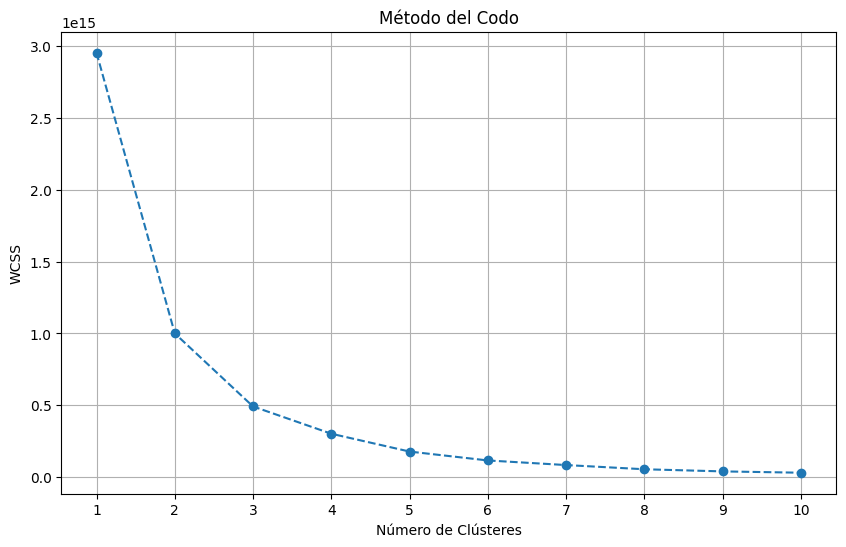

In [57]:
#diagrama de codo para identificar el valor optimo ---

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Agrupar datos de clientes
clientes = df.groupby('ID Cliente').agg({
    'Cantidad': 'sum',
    'Monto': 'sum'
}).rename(columns={'Cantidad': 'frecuencia_compra', 'Monto': 'monto_total'})

# Lista para almacenar los valores de WCSS
wcss = []

# Probar K-Means con diferentes números de clústeres
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clientes)
    wcss.append(kmeans.inertia_)

# Generar el diagrama de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


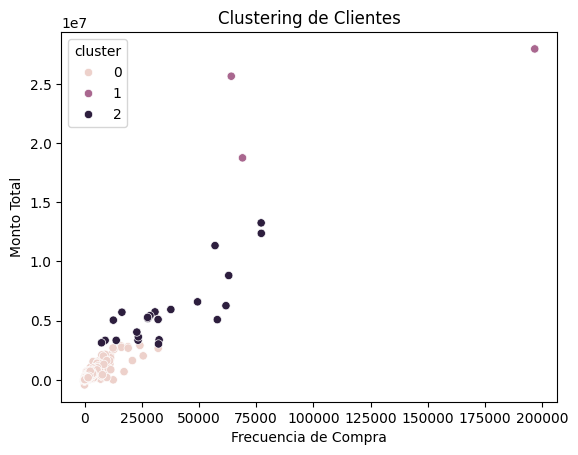

In [55]:

# Clustering de clientes
clientes = df.groupby('ID Cliente').agg({
    'Cantidad': 'sum',
    'Monto': 'sum'
}).rename(columns={'Cantidad': 'frecuencia_compra', 'Monto': 'monto_total'})

# Aplicar K-Means
kmeans = KMeans(n_clusters=3)
clientes['cluster'] = kmeans.fit_predict(clientes[['frecuencia_compra', 'monto_total']])

# Visualizar clústeres
sns.scatterplot(x='frecuencia_compra', y='monto_total', hue='cluster', data=clientes)
plt.title('Clustering de Clientes')
plt.xlabel('Frecuencia de Compra')
plt.ylabel('Monto Total')
plt.show()

In [52]:
# Identificar los meses con las ventas más altas
picos_ventas = ventas_mensuales.sort_values(ascending=False).head(3)
print("Meses con los picos de ventas más altos:")
print(picos_ventas)

# Filtrar datos para esos meses y analizar eventos/campañas
picos_meses = picos_ventas.index

for mes in picos_meses:
    print(f"Análisis del mes: {mes}")
    ventas_mes = df[df['mes'] == mes]

    # Agrupar por producto para ver qué productos fueron más vendidos
    productos_mes = ventas_mes.groupby('N° de factura')['Cantidad'].sum().sort_values(ascending=False)
    print("Productos más vendidos en este mes:")
    print(productos_mes.head(10))

    # Aquí podríamos agregar análisis de campañas, promociones, etc.
    # Por ejemplo, si tenemos una columna de 'promociones' o 'eventos'
    # print(ventas_mes['promociones'].value_counts())

Meses con los picos de ventas más altos:
mes
2021-11    669915
2021-10    569666
2021-09    537496
Freq: M, Name: Cantidad, dtype: int64
Análisis del mes: 2021-11
Productos más vendidos en este mes:
N° de factura
578841    12540
575508     6712
578140     5760
574328     4981
574341     4752
575219     4675
574092     4074
574294     3840
578125     3806
575335     3684
Name: Cantidad, dtype: int64
Análisis del mes: 2021-10
Productos más vendidos en este mes:
N° de factura
572035    13392
569570     7020
569650     6895
569815     6016
571318     5952
571653     5918
573153     5205
569572     5000
573008     4936
571937     4462
Name: Cantidad, dtype: int64
Análisis del mes: 2021-09
Productos más vendidos en este mes:
N° de factura
567423    12572
566595     7824
567280     6932
567381     6760
565475     5034
566557     4951
565150     4871
566494     4072
567290     3717
566934     2893
Name: Cantidad, dtype: int64


Error Cuadrático Medio (MSE): 1865501.708346652
Coeficiente de Determinación (R^2): -0.00018455150658569508
Coeficientes del modelo: [-12.11844197]
Intersección del modelo: 212.87352812908853


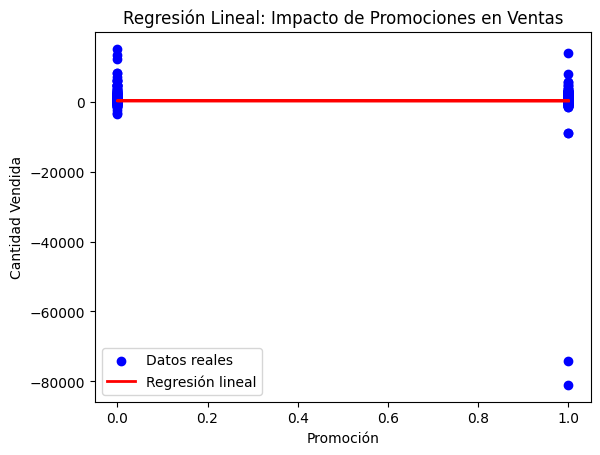

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV
df = pd.read_csv('/ventas-por-factura.csv', parse_dates=['Fecha de factura'])

# Verificar las primeras filas del DataFrame
df.head()

# Verificar si la columna 'Promoción' existe y es adecuada para el análisis
if 'Promoción' not in df.columns:
    # Crear una columna 'Promoción' de ejemplo
    df['Promoción'] = np.random.randint(0, 2, size=len(df))

# Convertir 'Promoción' a variable numérica si no lo es
df['Promoción'] = df['Promoción'].astype(int)

# Crear variables independientes (X) y dependiente (y)
X = df[['Promoción']]  # Puedes agregar más variables aquí si las tienes
y = df['Cantidad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir las ventas en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

# Mostrar los coeficientes del modelo
print(f'Coeficientes del modelo: {model.coef_}')
print(f'Intersección del modelo: {model.intercept_}')

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal: Impacto de Promociones en Ventas')
plt.xlabel('Promoción')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.show()

